# üëáËøôÈáåËøõË°åÊ∑±Â∫¶Â≠¶‰π†ÔºàÁ•ûÁªèÁΩëÁªúÔºâÁöÑÊµãËØï

In [180]:
import tensorflow as tf
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, explained_variance_score


# ‰ªéExcelÊñá‰ª∂ËØªÂèñÊï∞ÊçÆ
data = pd.read_excel('20230927_grinding_data.xlsx', header=None)
# ÊâìÁ£®Âäõ ËøõÁªôÈÄüÂ∫¶ Á£®Â§¥ËΩ¨ÈÄü Á†ÇÁ∫∏ÁõÆÊï∞ Ë°®Èù¢Á≤óÁ≥ôÂ∫¶
# print(data.iloc[1:, :4])
# Ëé∑ÂèñÂêÑÂàóÊï∞ÊçÆ
x = data.iloc[1:, :4].applymap(lambda x: math.log(x)).values
# print(x)
y = data.iloc[1:, 4].apply(lambda x: math.log(x)).values

# # ÁªòÂà∂Êï∞ÊçÆÂõæÂÉè
# plt.rcParams['font.sans-serif'] = ['SimHei']  # ËÆæÁΩÆ‰∏≠ÊñáÊòæÁ§∫
# plt.rcParams['axes.unicode_minus'] = False    # Ëß£ÂÜ≥‰øùÂ≠òÂõæÂÉèÊòØË¥üÂè∑'-'ÊòæÁ§∫‰∏∫ÊñπÂùóÁöÑÈóÆÈ¢ò

# plt.scatter(x[:, 0], y)  # ËøôÈáåÈÄâÊã©Á¨¨‰∏Ä‰∏™Ëá™ÂèòÈáèÂíåÂõ†ÂèòÈáè
# plt.xlabel('ÊâìÁ£®ÂäõÔºàlogÔºâ')
# plt.ylabel('Ë°®Èù¢Á≤óÁ≥ôÂ∫¶ÔºàlogÔºâ')
# plt.show()

# ‰ΩøÁî®È´òÁ∫ß Keras API ÊûÑÂª∫Ê®°Âûã„ÄÇ
####################################
# ÂèØ‰øÆÊîπÂèÇÊï∞ÔºàÁΩëÁªúÊ®°ÂûãÁöÑÊï∞Èáè„ÄÅËøûÊé•ÂΩ¢Âºè„ÄÅÊ≠£ÂàôÈ°πÁöÑÈÄâÊã©Ôºâ
model = tf.keras.Sequential([
    # tf.keras.layers.Dense(10, activation='relu', input_shape=(4,)),
    # Ê∑ªÂä†L2Ê≠£ÂàôÈ°π
    tf.keras.layers.Dense(10, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01), input_shape=(4,)),
    tf.keras.layers.Dense(1)
])

# # Â±ïÁ§∫Ê®°ÂûãÁöÑÁªìÊûÑ
# model.summary()

##################################
# ÂèØ‰øÆÊîπÂèÇÊï∞Ôºà‰ºòÂåñÁÆóÊ≥ïÁöÑÈÄâÊã©„ÄêSGD„ÄÅAdam„ÄëÔºâ
# ÁºñËØëÊ®°Âûã„ÄÇ
opt = tf.keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer=opt, loss='mean_squared_error')


###################################
# ÂèØ‰øÆÊîπÂèÇÊï∞ÔºàËÆ≠ÁªÉÊ¨°Êï∞Ôºâ
# ÂºÄÂßãËÆ≠ÁªÉ + ‰øùÂ≠ò
# verbose: ÊéßÂà∂ËÆ≠ÁªÉËøáÁ®ã‰∏≠ËæìÂá∫ÁöÑ‰ø°ÊÅØ„ÄÇÂÆÉÂèØ‰ª•Âèñ‰ª•‰∏ãÂÄºÔºö

# 0Ôºö‰∏çËæìÂá∫ËÆ≠ÁªÉ‰ø°ÊÅØ„ÄÇ
# 1ÔºöÊòæÁ§∫‰∏Ä‰∏™ËøõÂ∫¶Êù°ÔºåÂëäËØâ‰Ω†ÊØè‰∏™Âë®ÊúüÁöÑËÆ≠ÁªÉÊÉÖÂÜµ„ÄÇ
# 2ÔºöÂè™ÊòæÁ§∫ÊØè‰∏™Âë®ÊúüÁöÑÊÄªÊçüÂ§±„ÄÇ
model.fit(x, y, epochs=1000, verbose=2)

model.save('saved_model/my_model_tep')

pred = model.predict(x)
# ‰ΩøÁî®ËØÑ‰º∞ÊåáÊ†á
mse = mean_squared_error(y, pred)
r2 = r2_score(y, pred)
mae = mean_absolute_error(y, pred)
evs = explained_variance_score(y, pred)

print(f"Mean Squared Error: {mse}")
print(f"R¬≤ Score: {r2}")
print(f"Mean Absolute Error: {mae}")
print(f"Explained Variance Score: {evs}")

# ÂØºÂÖ•Ê®°ÂûãÊñá‰ª∂
new_model = tf.keras.models.load_model('saved_model/my_model_original')
# È¢ÑÊµãÁªìÊûú„ÄÇ
pred_new = new_model.predict(x)
r2_new = r2_score(y, pred_new)

if r2 > r2_new:
    model.save('saved_model/my_model_original')

Epoch 1/1000
2/2 - 0s - loss: 10.6586 - 266ms/epoch - 133ms/step
Epoch 2/1000
2/2 - 0s - loss: 4.1957 - 3ms/epoch - 1ms/step
Epoch 3/1000
2/2 - 0s - loss: 0.8977 - 3ms/epoch - 2ms/step
Epoch 4/1000
2/2 - 0s - loss: 0.2628 - 2ms/epoch - 950us/step
Epoch 5/1000
2/2 - 0s - loss: 1.0313 - 2ms/epoch - 1ms/step
Epoch 6/1000
2/2 - 0s - loss: 1.8134 - 2ms/epoch - 1ms/step
Epoch 7/1000
2/2 - 0s - loss: 1.8352 - 3ms/epoch - 2ms/step
Epoch 8/1000
2/2 - 0s - loss: 1.2760 - 2ms/epoch - 1ms/step
Epoch 9/1000
2/2 - 0s - loss: 0.6358 - 3ms/epoch - 2ms/step
Epoch 10/1000
2/2 - 0s - loss: 0.2181 - 2ms/epoch - 1ms/step
Epoch 11/1000
2/2 - 0s - loss: 0.1821 - 2ms/epoch - 993us/step
Epoch 12/1000
2/2 - 0s - loss: 0.3477 - 2ms/epoch - 1ms/step
Epoch 13/1000
2/2 - 0s - loss: 0.3235 - 3ms/epoch - 1ms/step
Epoch 14/1000
2/2 - 0s - loss: 0.1638 - 2ms/epoch - 1000us/step
Epoch 15/1000
2/2 - 0s - loss: 0.2106 - 2ms/epoch - 1000us/step
Epoch 16/1000
2/2 - 0s - loss: 0.2459 - 2ms/epoch - 988us/step
Epoch 17/1000
2/

INFO:tensorflow:Assets written to: saved_model/my_model_tep\assets


INFO:tensorflow:Assets written to: saved_model/my_model_tep\assets


2/2 [==============================] - 0s 2ms/step
Mean Squared Error: 0.03053986206964748
R¬≤ Score: 0.23645940400043086
Mean Absolute Error: 0.13443267124385386
Explained Variance Score: 0.3494857280295671
2/2 [==============================] - 0s 2ms/step


Model: "sequential_59"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_118 (Dense)           (None, 10)                50        
                                                                 
 dense_119 (Dense)           (None, 1)                 11        
                                                                 
Total params: 61
Trainable params: 61
Non-trainable params: 0
_________________________________________________________________
2/2 [==============================] - 0s 2ms/step


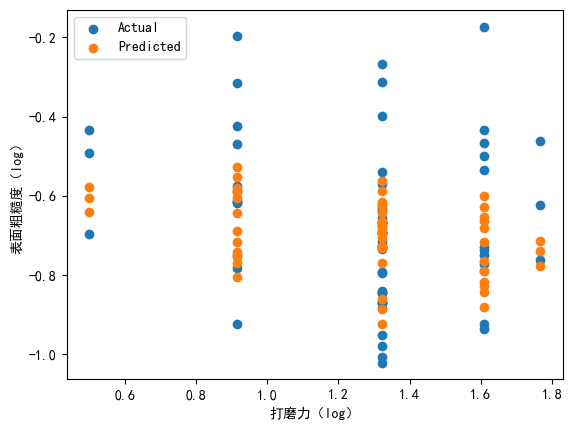

Mean Squared Error: 0.02890235233536529
R¬≤ Score: 0.27739950895629295
Mean Absolute Error: 0.13518786331279511
Explained Variance Score: 0.3053222101669879


In [169]:
# ÂØºÂÖ•Ê®°ÂûãÊñá‰ª∂
new_model = tf.keras.models.load_model('saved_model/my_model_original')
# Ê£ÄÈ™åÊ®°Âûã
new_model.summary()

# model = new_model

# È¢ÑÊµãÁªìÊûú„ÄÇ
pred = new_model.predict(x)

# ÁªòÂà∂ÊãüÂêàÁªìÊûú„ÄÇ
plt.scatter(x[:, 0], y, label='Actual')
plt.scatter(x[:, 0], pred, label='Predicted')
plt.xlabel('ÊâìÁ£®ÂäõÔºàlogÔºâ')
plt.ylabel('Ë°®Èù¢Á≤óÁ≥ôÂ∫¶ÔºàlogÔºâ')
plt.legend()
plt.show()

# ‰ΩøÁî®ËØÑ‰º∞ÊåáÊ†á
mse = mean_squared_error(y, pred)
r2 = r2_score(y, pred)
mae = mean_absolute_error(y, pred)
evs = explained_variance_score(y, pred)

print(f"Mean Squared Error: {mse}")
print(f"R¬≤ Score: {r2}")
print(f"Mean Absolute Error: {mae}")
print(f"Explained Variance Score: {evs}")

## ÁªòÂà∂Êõ≤Èù¢Âõæ

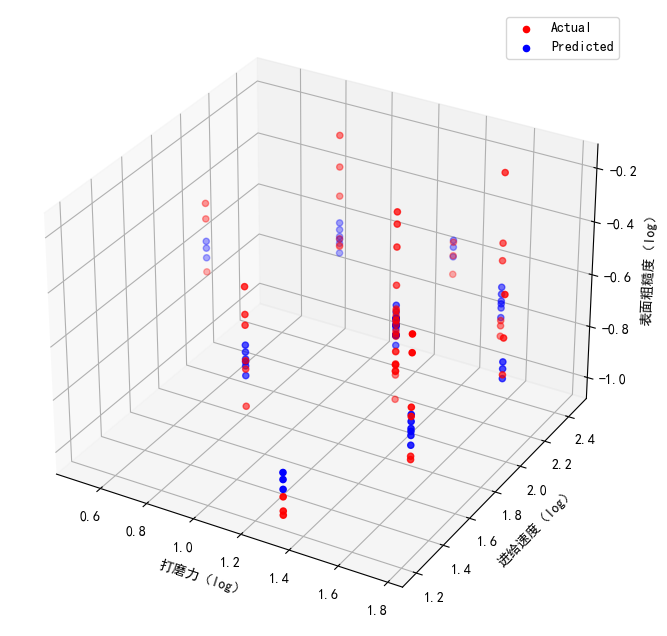

In [170]:
from mpl_toolkits.mplot3d import Axes3D

# ÂàõÂª∫‰∏Ä‰∏™ 3D ÂõæÂΩ¢ÂØπË±°
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# ÁªòÂà∂Êï£ÁÇπÂõæ
ax.scatter(x[:, 0], x[:, 1], y, c='r', label='Actual')
ax.scatter(x[:, 0], x[:, 1], pred, c='b', label='Predicted')

# Ê∑ªÂä†ËΩ¥Ê†áÁ≠æ
ax.set_xlabel('ÊâìÁ£®ÂäõÔºàlogÔºâ')
ax.set_ylabel('ËøõÁªôÈÄüÂ∫¶ÔºàlogÔºâ')
ax.set_zlabel('Ë°®Èù¢Á≤óÁ≥ôÂ∫¶ÔºàlogÔºâ')

# Ê∑ªÂä†Âõæ‰æã
ax.legend()

plt.show()


plt.show()

313/313 [==============================] - 0s 579us/step


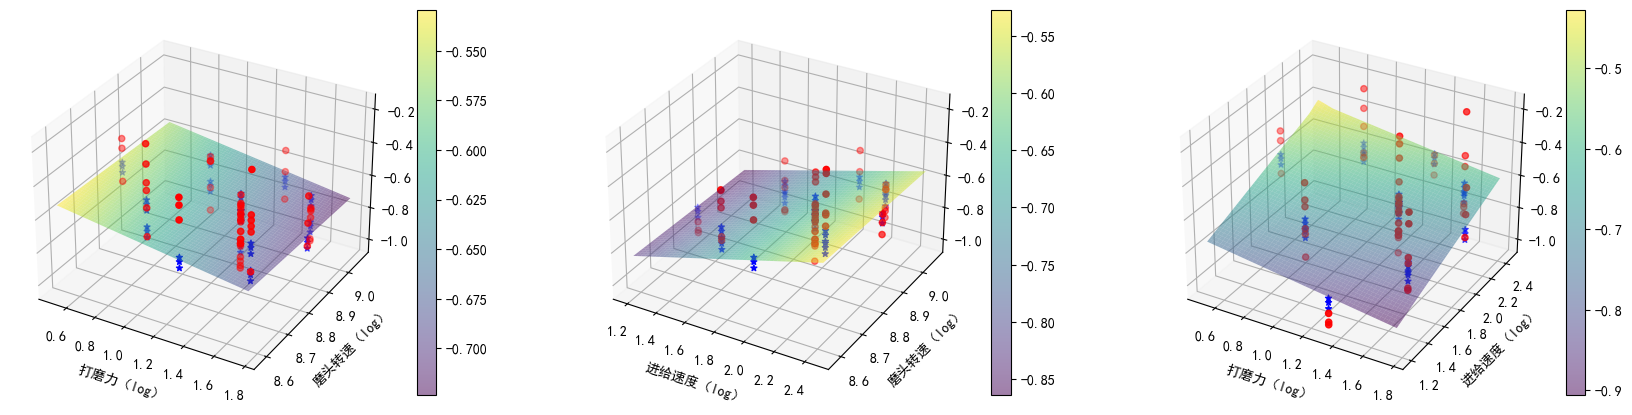

In [175]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# ÁªòÂà∂x1Ôºåx2ÂíåyÔºåpred

# ÁîüÊàê‰∏ÄÁªÑÊñ∞ÁöÑÊï∞ÊçÆÔºåÂåÖÊã¨x1„ÄÅx2„ÄÅx3„ÄÅx4
x1 = np.linspace(min(x[:, 0]), max(x[:, 0]), 100)
x2 = np.linspace(min(x[:, 1]), max(x[:, 1]), 100)
x3 = np.linspace(min(x[:, 2]), max(x[:, 2]), 100)
# # print(x1.shape)
# # ÂàõÂª∫‰∏Ä‰∏™ÁΩëÊ†º
# X1_mesh, X2_mesh = np.meshgrid(x1, x2)
# X1 = X1_mesh.reshape(-1, )
# X2 = X2_mesh.reshape(-1, )
# # print(X1.shape)
# # Ëé∑ÂèñÈ¢ÑÊµãÂÄº
# X3 = np.full_like(X1, np.log(7000))
# X4 = np.full_like(X2, np.log(600))

# # Â∞ÜÊñ∞ÁöÑÊï∞ÊçÆÂêàÂπ∂Êàê‰∏Ä‰∏™Êï∞ÁªÑ
# new_x = np.column_stack((X1, X2, X3, X4))

# # È¢ÑÊµãÊñ∞ÁöÑÊï∞ÊçÆ
# pred_new = model.predict(new_x)

# # Â∞ÜÈ¢ÑÊµãÁªìÊûúÂèòÂΩ¢ÂõûÁΩëÊ†ºÁöÑÂΩ¢Áä∂
# Z = pred_new.reshape(X1_mesh.shape)

# # print(Z.shape)
# # ÂàõÂª∫3DÂõæ
# fig = plt.figure(figsize=(10, 6))
# ax = fig.add_subplot(111, projection='3d')

# # ÁªòÂà∂Êï£ÁÇπÂõæ
# ax.scatter(x[:, 0], x[:, 1], y, c='r', label='Actual', marker='o')
# ax.scatter(x[:, 0], x[:, 1], pred, c='b', label='Predicted', marker='x')

# # ÁªòÂà∂Êõ≤Èù¢Âõæ
# surf = ax.plot_surface(X1_mesh, X2_mesh, Z, cmap='viridis', alpha=0.5, antialiased=True)

# # Ê∑ªÂä†È¢úËâ≤Êù°
# fig.colorbar(surf)

# # Ê∑ªÂä†Ê†áÁ≠æ
# ax.set_xlabel('ÊâìÁ£®ÂäõÔºàlogÔºâ')
# ax.set_ylabel('ËøõÁªôÈÄüÂ∫¶ÔºàlogÔºâ')
# ax.set_zlabel('Ë°®Èù¢Á≤óÁ≥ôÂ∫¶ÔºàlogÔºâ')

# plt.show()

###############################################################
# ÂàÜÂà´ÁªòÂà∂x1Ôºåx2Ôºåx3ÂíåyÔºåpred

# ÁîüÊàêx1Âíåx3ÁöÑÁΩëÊ†º
X1_mesh_1, X3_mesh_1 = np.meshgrid(x1, x3)
X1 = X1_mesh_1.reshape(-1, )
X3 = X3_mesh_1.reshape(-1, )

# Ëé∑ÂèñÈ¢ÑÊµãÂÄº
X2 = np.full_like(X1, np.log(7.5))
X4 = np.full_like(X3, np.log(600))

# Â∞ÜÊñ∞ÁöÑÊï∞ÊçÆÂêàÂπ∂Êàê‰∏Ä‰∏™Êï∞ÁªÑ
new_x_1 = np.column_stack((X1, X2, X3, X4))

# È¢ÑÊµãÊñ∞ÁöÑÊï∞ÊçÆ
pred_new_1 = model.predict(new_x_1)

# Â∞ÜÈ¢ÑÊµãÁªìÊûúÂèòÂΩ¢ÂõûÁΩëÊ†ºÁöÑÂΩ¢Áä∂
Z_1 = pred_new_1.reshape(X1_mesh_1.shape)

# ÁîüÊàêx2Âíåx3ÁöÑÁΩëÊ†º
X2_mesh_2, X3_mesh_2 = np.meshgrid(x2, x3)
X2 = X2_mesh_2.reshape(-1, )
X3 = X3_mesh_2.reshape(-1, )

# Ëé∑ÂèñÈ¢ÑÊµãÂÄº
X1 = np.full_like(X2, np.log(3.75))
X4 = np.full_like(X3, np.log(600))

# Â∞ÜÊñ∞ÁöÑÊï∞ÊçÆÂêàÂπ∂Êàê‰∏Ä‰∏™Êï∞ÁªÑ
new_x_2 = np.column_stack((X1, X2, X3, X4))

# È¢ÑÊµãÊñ∞ÁöÑÊï∞ÊçÆ
pred_new_2 = model.predict(new_x_2)

# Â∞ÜÈ¢ÑÊµãÁªìÊûúÂèòÂΩ¢ÂõûÁΩëÊ†ºÁöÑÂΩ¢Áä∂
Z_2 = pred_new_2.reshape(X2_mesh_2.shape)

# ÁîüÊàêx1Âíåx2ÁöÑÁΩëÊ†º
X1_mesh_3, X2_mesh_3 = np.meshgrid(x1, x2)
X1 = X1_mesh_3.reshape(-1, )
X2 = X2_mesh_3.reshape(-1, )

# Ëé∑ÂèñÈ¢ÑÊµãÂÄº
X3 = np.full_like(X1, np.log(7000))
X4 = np.full_like(X2, np.log(600))

# Â∞ÜÊñ∞ÁöÑÊï∞ÊçÆÂêàÂπ∂Êàê‰∏Ä‰∏™Êï∞ÁªÑ
new_x_3 = np.column_stack((X1, X2, X3, X4))

# È¢ÑÊµãÊñ∞ÁöÑÊï∞ÊçÆ
pred_new_3 = model.predict(new_x_3)

# Â∞ÜÈ¢ÑÊµãÁªìÊûúÂèòÂΩ¢ÂõûÁΩëÊ†ºÁöÑÂΩ¢Áä∂
Z_3 = pred_new_3.reshape(X1_mesh_3.shape)

# ÂàõÂª∫Â≠êÂõæ
fig, axs = plt.subplots(1, 3, figsize=(21, 5), subplot_kw={'projection': '3d'})

# ÁªòÂà∂Êï£ÁÇπÂõæ
axs[0].scatter(x[:, 0], x[:, 2], y, c='r', label='Actual', marker='o')
axs[0].scatter(x[:, 0], x[:, 2], pred, c='b', label='Actual', marker='*')
axs[1].scatter(x[:, 1], x[:, 2], y, c='r', label='Actual', marker='o')
axs[1].scatter(x[:, 1], x[:, 2], pred, c='b', label='Actual', marker='*')
axs[2].scatter(x[:, 0], x[:, 1], y, c='r', label='Actual', marker='o')
axs[2].scatter(x[:, 0], x[:, 1], pred, c='b', label='Actual', marker='*')

# ÁªòÂà∂Êõ≤Èù¢Âõæ
surf1 = axs[0].plot_surface(X1_mesh_1, X3_mesh_1, Z_1, cmap='viridis', alpha=0.5, antialiased=True)
surf2 = axs[1].plot_surface(X2_mesh_2, X3_mesh_2, Z_2, cmap='viridis', alpha=0.5, antialiased=True)
surf3 = axs[2].plot_surface(X1_mesh_3, X2_mesh_3, Z_3, cmap='viridis', alpha=0.5, antialiased=True)

# Ê∑ªÂä†È¢úËâ≤Êù°
fig.colorbar(surf1, ax=axs[0])
fig.colorbar(surf2, ax=axs[1])
fig.colorbar(surf3, ax=axs[2])

# Ê∑ªÂä†Ê†áÁ≠æ
axs[0].set_xlabel('ÊâìÁ£®ÂäõÔºàlogÔºâ')
axs[0].set_ylabel('Á£®Â§¥ËΩ¨ÈÄüÔºàlogÔºâ')
axs[0].set_zlabel('Ë°®Èù¢Á≤óÁ≥ôÂ∫¶ÔºàlogÔºâ')

axs[1].set_xlabel('ËøõÁªôÈÄüÂ∫¶ÔºàlogÔºâ')
axs[1].set_ylabel('Á£®Â§¥ËΩ¨ÈÄüÔºàlogÔºâ')
axs[1].set_zlabel('Ë°®Èù¢Á≤óÁ≥ôÂ∫¶ÔºàlogÔºâ')

axs[2].set_xlabel('ÊâìÁ£®ÂäõÔºàlogÔºâ')
axs[2].set_ylabel('ËøõÁªôÈÄüÂ∫¶ÔºàlogÔºâ')
axs[2].set_zlabel('Ë°®Èù¢Á≤óÁ≥ôÂ∫¶ÔºàlogÔºâ')

plt.show()
